In [1]:
# Import all necessary packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read input train data

train = pd.read_csv("input/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Read input test data

test = pd.read_csv("input/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Split train data and change types

X_train = (train.iloc[:, 1:].values).astype('float32')
y_train = train.iloc[:, 0].values.astype('int32')
X_test = test.values.astype('float32')

In [5]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

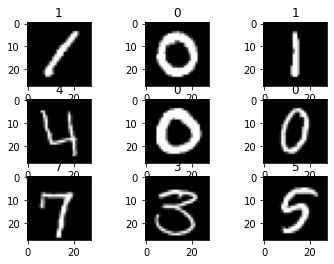

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(0, 9):
    plt.subplot(330 + (i + 1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [8]:
# Reshape train set

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_train.shape

(42000, 28, 28, 1)

In [9]:
# Reshape test set

X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_test.shape

(28000, 28, 28, 1)

In [10]:
# Standartize all values. It will be used as Lambda layer.

mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x - mean_px) / std_px

In [11]:
# One hot encoding

from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

In [12]:
# Fix random seed for reproducibility

seed = 42
np.random.seed(seed)

In [13]:
from keras.models import  Sequential
from keras.layers.core import  Lambda, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D, MaxPooling2D

In [14]:
model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        
        Convolution2D(32, (3, 3), activation='relu'),
        BatchNormalization(axis = 1),
        Dropout(0.5),
        
        Convolution2D(32, (3, 3), activation='relu'),
        
        MaxPooling2D(),
        BatchNormalization(axis = 1),
        Dropout(0.5),
        
        Convolution2D(64, (3, 3), activation='relu'),
        BatchNormalization(axis = 1),
        Dropout(0.5),
        
        Convolution2D(64, (3, 3), activation='relu'),
        MaxPooling2D(),
    
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
        ])
print("Input shape ", model.input_shape)
print("Output shape ", model.output_shape)

Input shape  (None, 28, 28, 1)
Output shape  (None, 10)


In [15]:
LR = 0.001
BATCH_SIZE = 64
EPOCHS = 100

In [16]:
from keras.optimizers import RMSprop
model.compile(optimizer = RMSprop(lr = LR), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [17]:
from keras.preprocessing import image
# gen = image.ImageDataGenerator()

gen = image.ImageDataGenerator(rotation_range = 8,
                               width_shift_range = 0.08,
                               shear_range = 0.3,
                               height_shift_range = 0.08,
                               zoom_range = 0.08)

# gen = image.ImageDataGenerator(rotation_range = 30,
#                                zoom_range = 0.15,
#                                width_shift_range = 0.2,
#                                height_shift_range = 0.2,
#                                shear_range = 0.15,
#                                horizontal_flip = True,
#                                fill_mode = "nearest")

In [18]:
from sklearn.model_selection import train_test_split
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.10, random_state = seed)
batches = gen.flow(X_train, y_train, batch_size = BATCH_SIZE)
val_batches = gen.flow(X_val, y_val, batch_size = BATCH_SIZE)

In [19]:
history = model.fit_generator(generator = batches,
                              steps_per_epoch = np.floor(batches.n / BATCH_SIZE),
                              epochs = EPOCHS,
                              validation_data = val_batches,
                              validation_steps = np.floor(val_batches.n / BATCH_SIZE))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
590/590 [==============================] - 7s 11ms/step - loss: 0.3493 - accuracy: 0.8897 - val_loss: 0.1235 - val_accuracy: 0.9608
Epoch 2/100
590/590 [==============================] - 7s 11ms/step - loss: 0.1156 - accuracy: 0.9641 - val_loss: 0.0514 - val_accuracy: 0.9837
Epoch 3/100
590/590 [==============================] - 6s 11ms/step - loss: 0.0882 - accuracy: 0.9734 - val_loss: 0.0620 - val_accuracy: 0.9825
Epoch 4/100
590/590 [==============================] - 7s 11ms/step - loss: 0.0759 - accuracy: 0.9770 - val_loss: 0.0466 - val_accuracy: 0.9849
Epoch 5/100
590/590 [==============================] - 6s 11ms/step - loss: 0.0653 - accuracy: 0.9795 - val_loss: 0.0388 - val_accuracy: 0.9894
Epoch 6/100
590/590 [==============================] - 7s 11ms/step - loss: 0.0573 - accuracy: 0.9826 - val_loss: 0.0411 - val_accuracy: 0.9865
Epoch 7/100
590/590 [==============================] - 7s 11

Epoch 56/100
590/590 [==============================] - 7s 11ms/step - loss: 0.0241 - accuracy: 0.9930 - val_loss: 0.0205 - val_accuracy: 0.9923
Epoch 57/100
590/590 [==============================] - 7s 11ms/step - loss: 0.0238 - accuracy: 0.9930 - val_loss: 0.0258 - val_accuracy: 0.9930
Epoch 58/100
590/590 [==============================] - 7s 11ms/step - loss: 0.0182 - accuracy: 0.9942 - val_loss: 0.0305 - val_accuracy: 0.9909
Epoch 59/100
590/590 [==============================] - 7s 11ms/step - loss: 0.0206 - accuracy: 0.9941 - val_loss: 0.0242 - val_accuracy: 0.9928
Epoch 60/100
590/590 [==============================] - 7s 11ms/step - loss: 0.0227 - accuracy: 0.9935 - val_loss: 0.0248 - val_accuracy: 0.9923
Epoch 61/100
590/590 [==============================] - 7s 11ms/step - loss: 0.0221 - accuracy: 0.9934 - val_loss: 0.0247 - val_accuracy: 0.9925
Epoch 62/100
590/590 [==============================] - 7s 11ms/step - loss: 0.0201 - accuracy: 0.9942 - val_loss: 0.0197 - val_ac

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

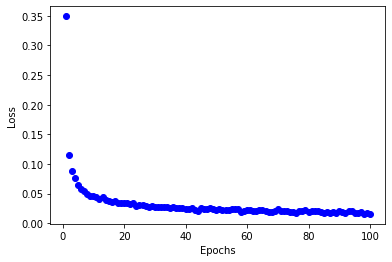

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [22]:
predictions = model.predict_classes(X_test)

submissions = pd.DataFrame({"ImageId": list(range(1, len(predictions) + 1)),
                            "Label": predictions})

submissions.to_csv("prediction.csv", index = False, header = True)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
